<a href="https://colab.research.google.com/github/MariamSayari/doc/blob/main/Reajustement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Load data

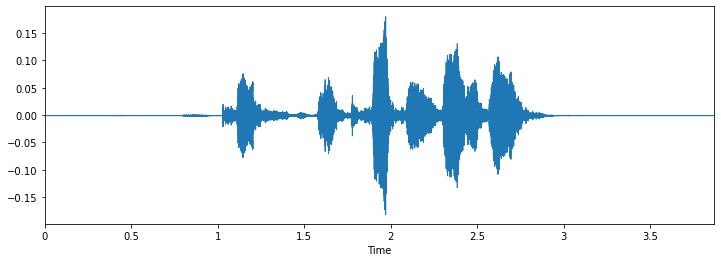

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
data, sampling_rate = librosa.load("/content/drive/My Drive/Colab Notebooks/Emotion_detection/Emo_Data/anger/03-01-05-01-01-01-01.wav",sr=8000)
data1, sampling_rate = librosa.load("/content/drive/My Drive/Colab Notebooks/Emotion_detection/Emo_Data/anger/03-01-05-01-01-01-03.wav",sr=8000)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data,sampling_rate)

In [10]:
import IPython.display
IPython.display.Audio(data=data1, rate=sampling_rate)

In [11]:
sampling_rate

8000

# MFCC — Mel-Frequency Cepstral Coefficients


In [13]:
mfccs_reference = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=12, n_fft=128, hop_length=128) #nfft=E(0.016 ms * 8000Hz)
print("Nb Coeff MFCC x Nb Fenetres :",mfccs_reference.shape) 

Nb Coeff MFCC x Nb Fenetres : (12, 242)


/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


Text(0.5, 0, 'Indice de la Trame')

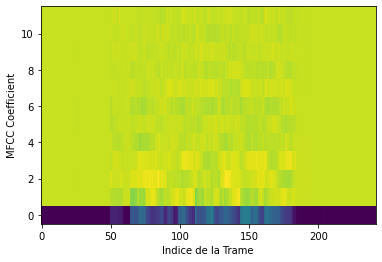

In [14]:
plt.imshow(mfccs_reference, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient')
plt.xlabel('Indice de la Trame')

In [15]:
mfccs_cible = librosa.feature.mfcc(data1,sr=sampling_rate, n_mfcc=12, n_fft=128, hop_length=128) 
print("Nb Coeff MFCC x Nb Fenetres :", mfccs_cible.shape)

Nb Coeff MFCC x Nb Fenetres : (12, 251)


/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


Text(0.5, 0, 'Indice de la Trame')

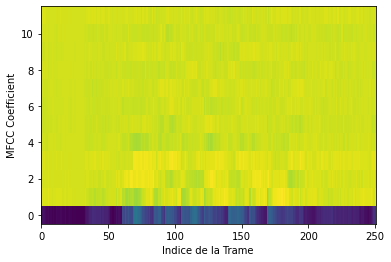

In [16]:
plt.imshow(mfccs_cible, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient')
plt.xlabel('Indice de la Trame')

# DTW — Dynamic Time Warping


In [17]:
!pip install dtaidistance

     |████████████████████████████████| 942kB 8.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.2.5-cp37-cp37m-linux_x86_64.whl size=1552492 sha256=9786f2a572b79988c7e0e28c22d06caaeacbbca549e3ca20371d9ac0786cf064
  Stored in directory: /root/.cache/pip/wheels/f8/37/a3/5b68a20ca502772e5affea6be75bf964ad9f481fdc54f28627
Successfully built dtaidistance


In [18]:
from dtaidistance import dtw_ndim
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import random
import numpy as np

(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f27d6f04550>])

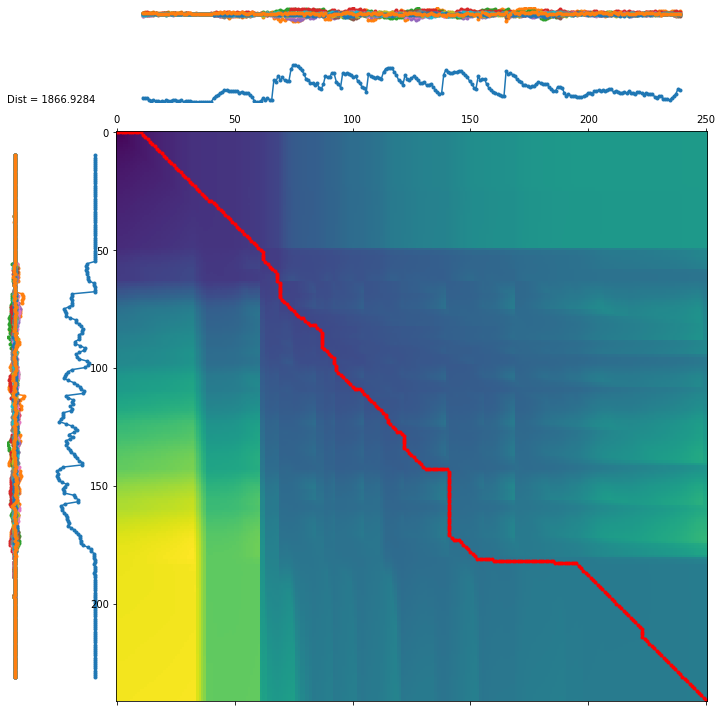

In [19]:
d, paths = dtw_ndim.warping_paths(mfccs_reference.T, mfccs_cible.T)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(mfccs_reference.T, mfccs_cible.T,paths, best_path)

In [103]:
L=[]
for i in range (len(best_path)):
  L.append(best_path[i][1])


In [104]:
max(L)

250

In [110]:
best_path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 11),
 (2, 12),
 (3, 13),
 (4, 14),
 (5, 15),
 (6, 16),
 (7, 17),
 (8, 18),
 (9, 19),
 (10, 20),
 (11, 21),
 (12, 22),
 (13, 23),
 (14, 24),
 (15, 25),
 (16, 26),
 (17, 27),
 (18, 28),
 (19, 29),
 (20, 30),
 (21, 31),
 (22, 32),
 (23, 33),
 (24, 34),
 (25, 35),
 (26, 36),
 (27, 37),
 (28, 38),
 (29, 39),
 (29, 40),
 (30, 41),
 (31, 42),
 (32, 43),
 (33, 44),
 (34, 45),
 (35, 46),
 (36, 47),
 (37, 48),
 (38, 49),
 (39, 50),
 (40, 51),
 (41, 52),
 (42, 53),
 (43, 54),
 (44, 55),
 (45, 56),
 (46, 57),
 (47, 58),
 (48, 59),
 (49, 60),
 (50, 61),
 (51, 62),
 (52, 62),
 (53, 62),
 (54, 62),
 (55, 63),
 (56, 64),
 (57, 65),
 (58, 66),
 (59, 67),
 (60, 68),
 (61, 68),
 (62, 68),
 (63, 68),
 (64, 69),
 (65, 69),
 (66, 69),
 (67, 69),
 (68, 69),
 (69, 69),
 (70, 69),
 (71, 70),
 (72, 71),
 (73, 72),
 (74, 73),
 (75, 74),
 (76, 75),
 (77, 76),
 (78, 77),
 (79, 78),
 (79, 79),
 (80, 80),
 (81, 8

# Pitch Detection

In [21]:
!pip install praat-parselmouth

     |████████████████████████████████| 10.7MB 6.1MB/s 


In [51]:
import parselmouth
import numpy as np
#import matplotlib.pyplot as plt
from scipy.io import wavfile
import seaborn as sns
sns.set() 
snd1= parselmouth.Sound(data,sampling_frequency=8000.0) 
snd2= parselmouth.Sound(data1,sampling_frequency=8000.0)
pitch1 = snd1.to_pitch(time_step=0.016)
pitch2 = snd2.to_pitch(time_step=0.016)
pitch_values1 = pitch1.selected_array['frequency']
pitch_values2 = pitch2.selected_array['frequency']

In [105]:
len(pitch_values2)

248

In [54]:
#best_path

In [178]:
path_synchro=[]
for i in range (len(best_path)):
  if((best_path[i][0]not in [239,240,241])&(best_path[i][1]not in [248,249,250])):
    path_synchro.append(best_path[i])

In [179]:
path_synchro

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 11),
 (2, 12),
 (3, 13),
 (4, 14),
 (5, 15),
 (6, 16),
 (7, 17),
 (8, 18),
 (9, 19),
 (10, 20),
 (11, 21),
 (12, 22),
 (13, 23),
 (14, 24),
 (15, 25),
 (16, 26),
 (17, 27),
 (18, 28),
 (19, 29),
 (20, 30),
 (21, 31),
 (22, 32),
 (23, 33),
 (24, 34),
 (25, 35),
 (26, 36),
 (27, 37),
 (28, 38),
 (29, 39),
 (29, 40),
 (30, 41),
 (31, 42),
 (32, 43),
 (33, 44),
 (34, 45),
 (35, 46),
 (36, 47),
 (37, 48),
 (38, 49),
 (39, 50),
 (40, 51),
 (41, 52),
 (42, 53),
 (43, 54),
 (44, 55),
 (45, 56),
 (46, 57),
 (47, 58),
 (48, 59),
 (49, 60),
 (50, 61),
 (51, 62),
 (52, 62),
 (53, 62),
 (54, 62),
 (55, 63),
 (56, 64),
 (57, 65),
 (58, 66),
 (59, 67),
 (60, 68),
 (61, 68),
 (62, 68),
 (63, 68),
 (64, 69),
 (65, 69),
 (66, 69),
 (67, 69),
 (68, 69),
 (69, 69),
 (70, 69),
 (71, 70),
 (72, 71),
 (73, 72),
 (74, 73),
 (75, 74),
 (76, 75),
 (77, 76),
 (78, 77),
 (79, 78),
 (79, 79),
 (80, 80),
 (81, 8

In [180]:
L=[]
for i in range (len(path_synchro)):
  L.append(path_synchro[i][1])


In [181]:
max(L)

247

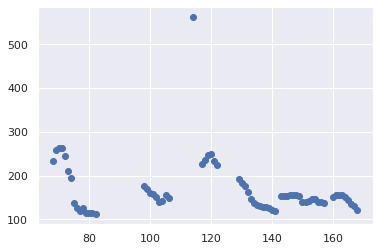

In [182]:
import pandas as pd
for i in range (len(pitch_values1)):
  if (pitch_values1[i]==0.0):
    pitch_values1[i]=None
Columns=[]
for i in range (len(pitch_values1)):
  Columns.append(i)
plt.scatter(Columns, pitch_values1)


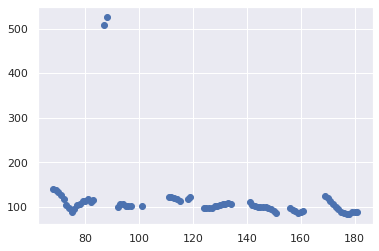

In [183]:
for i in range (len(pitch_values2)):
  if (pitch_values2[i]==0.0):
    pitch_values2[i]=None
Columns=[]
for i in range (len(pitch_values2)):
  Columns.append(i)
plt.scatter(Columns, pitch_values2)

In [184]:
df1 = pd.DataFrame(pitch_values1)
Pitch1=df1.rename(columns = {0:'Pitch'})
df2 = pd.DataFrame(pitch_values2)
Pitch2=df2.rename(columns = {0:'Pitch'})

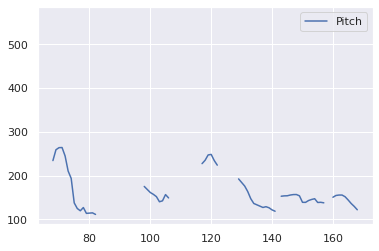

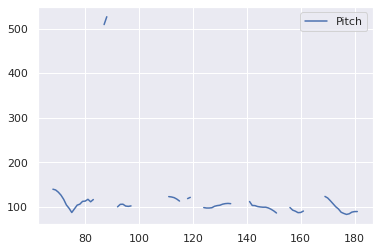

In [185]:
Pitch1.plot()
Pitch2.plot()

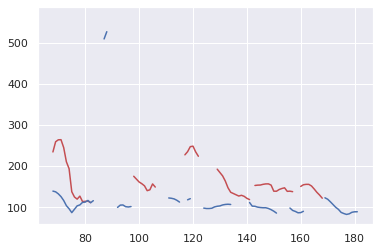

In [186]:
plt.plot(Pitch1, 'r') 
plt.plot(Pitch2, 'b') 

# Alignement des Pitch


In [187]:
type(pitch_values1)

numpy.ndarray

In [188]:
pitch__1=pitch_values1.tolist()
pitch__2=pitch_values2.tolist()

In [189]:
i=0
best_path_tran={}
for i in range (len(pitch_values1)):
  best_path_tran[i]=[]


In [190]:
path_synchro

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 11),
 (2, 12),
 (3, 13),
 (4, 14),
 (5, 15),
 (6, 16),
 (7, 17),
 (8, 18),
 (9, 19),
 (10, 20),
 (11, 21),
 (12, 22),
 (13, 23),
 (14, 24),
 (15, 25),
 (16, 26),
 (17, 27),
 (18, 28),
 (19, 29),
 (20, 30),
 (21, 31),
 (22, 32),
 (23, 33),
 (24, 34),
 (25, 35),
 (26, 36),
 (27, 37),
 (28, 38),
 (29, 39),
 (29, 40),
 (30, 41),
 (31, 42),
 (32, 43),
 (33, 44),
 (34, 45),
 (35, 46),
 (36, 47),
 (37, 48),
 (38, 49),
 (39, 50),
 (40, 51),
 (41, 52),
 (42, 53),
 (43, 54),
 (44, 55),
 (45, 56),
 (46, 57),
 (47, 58),
 (48, 59),
 (49, 60),
 (50, 61),
 (51, 62),
 (52, 62),
 (53, 62),
 (54, 62),
 (55, 63),
 (56, 64),
 (57, 65),
 (58, 66),
 (59, 67),
 (60, 68),
 (61, 68),
 (62, 68),
 (63, 68),
 (64, 69),
 (65, 69),
 (66, 69),
 (67, 69),
 (68, 69),
 (69, 69),
 (70, 69),
 (71, 70),
 (72, 71),
 (73, 72),
 (74, 73),
 (75, 74),
 (76, 75),
 (77, 76),
 (78, 77),
 (79, 78),
 (79, 79),
 (80, 80),
 (81, 8

In [191]:
best_path_tran

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [],
 70: [],
 71: [],
 72: [],
 73: [],
 74: [],
 75: [],
 76: [],
 77: [],
 78: [],
 79: [],
 80: [],
 81: [],
 82: [],
 83: [],
 84: [],
 85: [],
 86: [],
 87: [],
 88: [],
 89: [],
 90: [],
 91: [],
 92: [],
 93: [],
 94: [],
 95: [],
 96: [],
 97: [],
 98: [],
 99: [],
 100: [],
 101: [],
 102: [],
 103: [],
 104: [],
 105: [],
 106: [],
 107: [],
 108: [],
 109: [],
 110: [],


In [192]:
path_synchro

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (1, 11),
 (2, 12),
 (3, 13),
 (4, 14),
 (5, 15),
 (6, 16),
 (7, 17),
 (8, 18),
 (9, 19),
 (10, 20),
 (11, 21),
 (12, 22),
 (13, 23),
 (14, 24),
 (15, 25),
 (16, 26),
 (17, 27),
 (18, 28),
 (19, 29),
 (20, 30),
 (21, 31),
 (22, 32),
 (23, 33),
 (24, 34),
 (25, 35),
 (26, 36),
 (27, 37),
 (28, 38),
 (29, 39),
 (29, 40),
 (30, 41),
 (31, 42),
 (32, 43),
 (33, 44),
 (34, 45),
 (35, 46),
 (36, 47),
 (37, 48),
 (38, 49),
 (39, 50),
 (40, 51),
 (41, 52),
 (42, 53),
 (43, 54),
 (44, 55),
 (45, 56),
 (46, 57),
 (47, 58),
 (48, 59),
 (49, 60),
 (50, 61),
 (51, 62),
 (52, 62),
 (53, 62),
 (54, 62),
 (55, 63),
 (56, 64),
 (57, 65),
 (58, 66),
 (59, 67),
 (60, 68),
 (61, 68),
 (62, 68),
 (63, 68),
 (64, 69),
 (65, 69),
 (66, 69),
 (67, 69),
 (68, 69),
 (69, 69),
 (70, 69),
 (71, 70),
 (72, 71),
 (73, 72),
 (74, 73),
 (75, 74),
 (76, 75),
 (77, 76),
 (78, 77),
 (79, 78),
 (79, 79),
 (80, 80),
 (81, 8

In [193]:
i=0
best_path_tran={}
for i in range (len(pitch_values1)):
  best_path_tran[i]=[]
for i in range(len(path_synchro)):
  best_path_tran[path_synchro[i][0]].append(path_synchro[i][1])


In [194]:
best_path_tran

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 1: [11],
 2: [12],
 3: [13],
 4: [14],
 5: [15],
 6: [16],
 7: [17],
 8: [18],
 9: [19],
 10: [20],
 11: [21],
 12: [22],
 13: [23],
 14: [24],
 15: [25],
 16: [26],
 17: [27],
 18: [28],
 19: [29],
 20: [30],
 21: [31],
 22: [32],
 23: [33],
 24: [34],
 25: [35],
 26: [36],
 27: [37],
 28: [38],
 29: [39, 40],
 30: [41],
 31: [42],
 32: [43],
 33: [44],
 34: [45],
 35: [46],
 36: [47],
 37: [48],
 38: [49],
 39: [50],
 40: [51],
 41: [52],
 42: [53],
 43: [54],
 44: [55],
 45: [56],
 46: [57],
 47: [58],
 48: [59],
 49: [60],
 50: [61],
 51: [62],
 52: [62],
 53: [62],
 54: [62],
 55: [63],
 56: [64],
 57: [65],
 58: [66],
 59: [67],
 60: [68],
 61: [68],
 62: [68],
 63: [68],
 64: [69],
 65: [69],
 66: [69],
 67: [69],
 68: [69],
 69: [69],
 70: [69],
 71: [70],
 72: [71],
 73: [72],
 74: [73],
 75: [74],
 76: [75],
 77: [76],
 78: [77],
 79: [78, 79],
 80: [80],
 81: [81],
 82: [82, 83, 84],
 83: [85],
 84: [86],
 85: [87],
 86: [87],
 87: [8

In [195]:
i=0
aligned_query_to_reference={}
for i in range (len(pitch_values1)):
  aligned_query_to_reference[i]=[]

In [196]:
aligned_query_to_reference

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [],
 70: [],
 71: [],
 72: [],
 73: [],
 74: [],
 75: [],
 76: [],
 77: [],
 78: [],
 79: [],
 80: [],
 81: [],
 82: [],
 83: [],
 84: [],
 85: [],
 86: [],
 87: [],
 88: [],
 89: [],
 90: [],
 91: [],
 92: [],
 93: [],
 94: [],
 95: [],
 96: [],
 97: [],
 98: [],
 99: [],
 100: [],
 101: [],
 102: [],
 103: [],
 104: [],
 105: [],
 106: [],
 107: [],
 108: [],
 109: [],
 110: [],


In [197]:
for i in range (len(aligned_query_to_reference)-1):
  for j in range (len(best_path_tran[i])):
    aligned_query_to_reference[i].append(pitch__2[best_path_tran[i][j]])

In [198]:
best_path_tran

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 1: [11],
 2: [12],
 3: [13],
 4: [14],
 5: [15],
 6: [16],
 7: [17],
 8: [18],
 9: [19],
 10: [20],
 11: [21],
 12: [22],
 13: [23],
 14: [24],
 15: [25],
 16: [26],
 17: [27],
 18: [28],
 19: [29],
 20: [30],
 21: [31],
 22: [32],
 23: [33],
 24: [34],
 25: [35],
 26: [36],
 27: [37],
 28: [38],
 29: [39, 40],
 30: [41],
 31: [42],
 32: [43],
 33: [44],
 34: [45],
 35: [46],
 36: [47],
 37: [48],
 38: [49],
 39: [50],
 40: [51],
 41: [52],
 42: [53],
 43: [54],
 44: [55],
 45: [56],
 46: [57],
 47: [58],
 48: [59],
 49: [60],
 50: [61],
 51: [62],
 52: [62],
 53: [62],
 54: [62],
 55: [63],
 56: [64],
 57: [65],
 58: [66],
 59: [67],
 60: [68],
 61: [68],
 62: [68],
 63: [68],
 64: [69],
 65: [69],
 66: [69],
 67: [69],
 68: [69],
 69: [69],
 70: [69],
 71: [70],
 72: [71],
 73: [72],
 74: [73],
 75: [74],
 76: [75],
 77: [76],
 78: [77],
 79: [78, 79],
 80: [80],
 81: [81],
 82: [82, 83, 84],
 83: [85],
 84: [86],
 85: [87],
 86: [87],
 87: [8

In [199]:
i=0
aligned_query_to_reference={}
for i in range (len(best_path_tran)-1):
  aligned_query_to_reference[i]=[]


In [200]:
aligned_query_to_reference

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [],
 70: [],
 71: [],
 72: [],
 73: [],
 74: [],
 75: [],
 76: [],
 77: [],
 78: [],
 79: [],
 80: [],
 81: [],
 82: [],
 83: [],
 84: [],
 85: [],
 86: [],
 87: [],
 88: [],
 89: [],
 90: [],
 91: [],
 92: [],
 93: [],
 94: [],
 95: [],
 96: [],
 97: [],
 98: [],
 99: [],
 100: [],
 101: [],
 102: [],
 103: [],
 104: [],
 105: [],
 106: [],
 107: [],
 108: [],
 109: [],
 110: [],


In [201]:
for i in range (len(aligned_query_to_reference)):
  for j in range (len(best_path_tran[i])):
    aligned_query_to_reference[i].append(pitch_values2[best_path_tran[i][j]])

In [202]:
aligned_query_to_reference

{0: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 1: [nan],
 2: [nan],
 3: [nan],
 4: [nan],
 5: [nan],
 6: [nan],
 7: [nan],
 8: [nan],
 9: [nan],
 10: [nan],
 11: [nan],
 12: [nan],
 13: [nan],
 14: [nan],
 15: [nan],
 16: [nan],
 17: [nan],
 18: [nan],
 19: [nan],
 20: [nan],
 21: [nan],
 22: [nan],
 23: [nan],
 24: [nan],
 25: [nan],
 26: [nan],
 27: [nan],
 28: [nan],
 29: [nan, nan],
 30: [nan],
 31: [nan],
 32: [nan],
 33: [nan],
 34: [nan],
 35: [nan],
 36: [nan],
 37: [nan],
 38: [nan],
 39: [nan],
 40: [nan],
 41: [nan],
 42: [nan],
 43: [nan],
 44: [nan],
 45: [nan],
 46: [nan],
 47: [nan],
 48: [nan],
 49: [nan],
 50: [nan],
 51: [nan],
 52: [nan],
 53: [nan],
 54: [nan],
 55: [nan],
 56: [nan],
 57: [nan],
 58: [nan],
 59: [nan],
 60: [139.2429236375786],
 61: [139.2429236375786],
 62: [139.2429236375786],
 63: [139.2429236375786],
 64: [137.53705693464659],
 65: [137.53705693464659],
 66: [137.53705693464659],
 67: [137.53705693464659],
 68: [137.5370569346465

In [203]:
Pitch_2_aligned=aligned_query_to_reference.values()

In [204]:
from statistics import mean
list_pitch2=list(Pitch_2_aligned)
Pitch_2_aligned_moy=[]
for i in range(len(list_pitch2)):
  Pitch_2_aligned_moy.append(mean(list_pitch2[i]))

In [206]:
len(Pitch_2_aligned_moy)

239

In [211]:
pitch_values1=pitch_values1[0:239]

In [212]:
len(pitch_values1)

239

In [215]:
p1=pitch_values1.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'Pitch'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


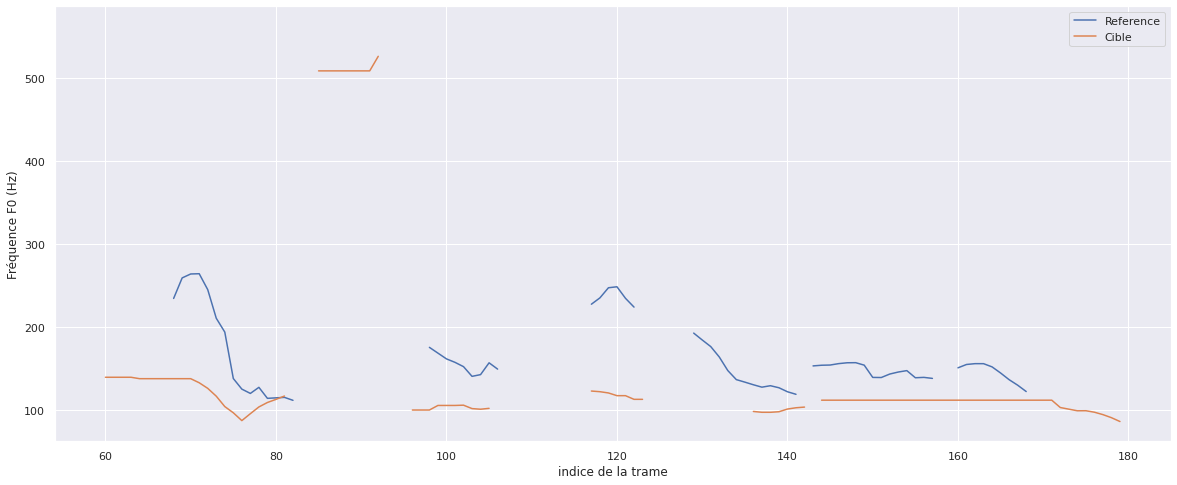

In [224]:
mths = np.arange(0,239)
plt.figure(figsize=(20,8))
plt.plot(mths,pitch_values1, '-', label="Reference")
plt.plot(mths,Pitch_2_aligned_moy , '-', label="Cible")
plt.xlabel("indice de la trame")
plt.ylabel("Fréquence F0 (Hz)")
plt.legend(loc="Pitch")

In [225]:
df1 = pd.DataFrame(pitch_values1)
reference1=df1.rename(columns = {0:'Pitch'})
df2 = pd.DataFrame(Pitch_2_aligned_moy)
cible2=df2.rename(columns = {0:'Pitch'})

In [227]:
reference1.to_csv("Réference.csv")
cible2.to_csv("cible.csv")

# Interpolation

In [228]:
Pitch1_interp=reference1.interpolate(method ='polynomial', limit_direction ='forward',order=3)
Pitch2_interp=cible2.interpolate(method ='polynomial', limit_direction ='backward',order=3)

Text(0, 0.5, 'Pitch(Hz)')

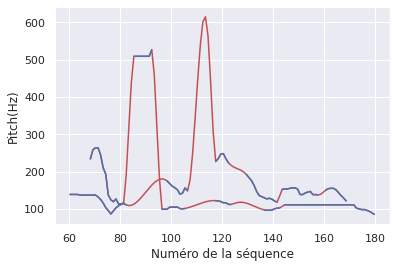

In [229]:
x = np.linspace(0, 239,239)
plt.plot(x, Pitch1_interp , color='r', label='sin') # r - red colour
plt.plot(x, reference1, color='b', label='cos') # g - green colour
plt.xlabel("Numéro de la séquence")
plt.ylabel("Pitch(Hz)")
x =  np.linspace(0,  239,239)
plt.plot(x, Pitch2_interp, color='r', label='sin') # r - red colour
plt.plot(x, cible2, color='b', label='cos') # g - green colour
plt.xlabel("Numéro de la séquence")
plt.ylabel("Pitch(Hz)")

In [230]:
Pitch1_interp.to_csv("Reference_interpolation.csv")
Pitch2_interp.to_csv("Cible_interpolation.csv")